# Sentiment Analysis 

## 0.Sampling

In [ ]:
import os
import numpy as np
import pandas as pd

# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# pre_aspect_df 로 되어야함.

# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/product-specific aspect term 추가/')
# aspects = pd.read_excel('aspect_term4product_count.xlsx',index_col = 0)

# aspects

,luxury,easy,durable,design,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust
0.0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1.0,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2.0,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3.0,luxurious,intuition,durability,beautifully,innovations,function,costly,installers,happiness,satisfactory,incredible,reputable,frustrate
4.0,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costlier,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,purification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pickle
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')

file_name = "aspect_categorized_mention.pkl"
# with open(file_name,'wb') as fw:
#     pickle.dump(df,fw) 

with open(file_name,'rb') as fr:
    df = pickle.load(fr) 

df.columns = ['UniversalMessageId', 'SocialNetwork', 'source', 'CreatedTime',
       'Domain', 'label', 'sents', 'customer_sents', 'remove_link_punc',
       'original', 'pre_sent', 'doc_id', 'token_a', 'joint_words', 'luxury',
       'easy', 'durable ', 'design', 'innovative', 'performance', 'affordable',
       'good_service ', 'happy', 'fulfillment', 'superb', 'proud', 'trust']


### sent_id 여기있다 Aspect 배정 전

In [ ]:
df.reset_index(inplace = True)
df['sent_id'] = df['index']
df.drop('index',axis = 1,inplace = True)

In [ ]:
df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust,sent_id
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
1,REDDIT_273_hqopz6d,NaN,Reddit,Dec 31 14:50:24 2021,reddit.com,lg_ref,"['Nope, also stay away from LG and Samsung.']","['nope, also stay away from lg and samsung.', ...",nope also stay away from lg and samsung,nope also stay away from lg and samsung,...,0,0,0,0,0,0,0,0,0,1
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,0,1,0,0,0,0,0,0,1,2
3,WEB_100_sg_C3F0D712F78A633B49DD608D95337DCF,NaN,Forums,Dec 31 14:27:00 2021,forums.redflagdeals.com,lg_ref,"['Dammit.', 'What should I do?', 'I already ha...",['i already have a dishwasher but i am in the ...,i already have a dishwasher but i am in the ma...,i already have a dishwasher but i am in the ma...,...,0,0,0,0,0,0,0,0,0,3
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,0,0,1,0,0,0,0,0,0,1055769
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,1,0,0,0,0,0,0,0,1055770
1055771,YOUTUBE_44_z22euh5jsqrojnjtoacdp432h4ptbim44dt...,YOUTUBE,Youtube,2017-10-06 23:16:38,NaN,ss_ac,NaN,NaN,NaN,13:41 Ok does anyone see the SAMSUNG air cond...,...,0,0,0,0,0,0,0,0,0,1055771
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,1,0,1,0,0,1055772


In [ ]:
# asp 있는거로만 남기기
from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

aspdf = df[asp_exist] 

NameError: ignored

In [ ]:
rv = 302857
tw = 94490
forum = 58709
fb = 43465
reddit = 29160
blog = 19978
insta = 7000
yt = 3855

all = rv+tw+forum+fb+reddit+blog+insta+yt

review_no = np.round(rv/all * 10000,0)
tw_no = np.round(tw/all * 10000,0)
forum_no = np.round(forum/all * 10000,0)
fb_no = np.round(fb/all * 10000,0)
reddit_no = np.round(reddit/all * 10000,0)
blog_no = np.round(blog/all * 10000,0)
insta_no = np.round(insta/all * 10000,0)
yt_no = np.round(yt/all * 10000,0)

total = review_no+tw_no+forum_no+fb_no+reddit_no+blog+insta_no+yt_no
total #10000

29621.0

In [ ]:
reddit = aspdf[aspdf['source'] == 'Reddit']
blog = aspdf[aspdf['source'] == 'Blog Post']
forum = aspdf[aspdf['source'] == 'Forums']
review = aspdf[aspdf['source'] == 'Reviews']
fb = aspdf[aspdf['source'] == 'Facebook']
tw = aspdf[aspdf['source'] == 'Twitter']
insta = aspdf[aspdf['source'] == 'Instagram' ]
youtube = aspdf[aspdf['source'] == 'Youtube']


dfs = [reddit,blog,forum,review,fb,tw,insta,youtube]
df_no = [reddit_no,blog_no,forum_no,review_no,fb_no,tw_no,insta_no,yt_no]

In [ ]:
# 샘플 뽑기
sample_df =pd.DataFrame() 
for i in range(len(dfs)):
  temp_df = dfs[i]
  sample_df = sample_df.append(temp_df.sample(n = int(df_no[i])),ignore_index=True)

In [ ]:
# 소스별 비율
sample_df['source'].value_counts()

Reviews      5413
Twitter      1689
Forums       1049
Facebook      777
Reddit        521
Blog Post     357
Instagram     125
Youtube        69
Name: source, dtype: int64

In [ ]:
sample_df[['sent_id','source','original']].to_excel("sample_df.xlsx")

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/sample 작업')
for i in range(5):
  file_name = "sample"+str(i)+".xlsx"
  sample_df[['sent_id','source','original']].iloc[0+2000*i:1999+2000*i].to_excel(file_name)
  # print(0+2000*i,1999+2000*i)

## test set 작업 완료후, df에 merge하여 붙여보기.

## 1.Load Data & libraries

### aspect 구분 안된 df ==> 못씀 별점 없음

aspect 구분 안된 df를 쓰는 이유는, Sentiment Analysis 의 자원인 review data를 최대한 활용하기 위함.

In [ ]:
# # 고객 Mention 불러오기

# ver = "_3"
# file_name = "Sentence_pos" + ver + ".pkl" 
# print(file_name)

# import pickle
# import os
# from tqdm import tqdm
# tqdm.pandas()

# os.chdir("/gdrive/MyDrive/LG 플젝-민/Sentence POS")

# # 피클 안됨 ver2는 됨
# with open(file_name,'rb') as fr:
#     df = pickle.load(fr) # ver2 3
# len(df)
# # # csv
# # import pandas as pd
# # df = pd.read_csv("Sentence_pos_1.csv") # ver1
# # len(df)

Sentence_pos_3.pkl


1055774

In [ ]:
# # 리스트로 인식

# from tqdm import tqdm
# tqdm.pandas()
# import ast

# # df['token_a'] = df['token_a'].progress_apply(lambda word_list: ast.literal_eval(word_list))
# df['joint_words'] = df['token_a'].progress_apply(lambda word_list: " ".join(word_list))
# df['joint_words'].loc[0]

100%|██████████| 1055774/1055774 [00:05<00:00, 177407.65it/s]


'model number lmxs image dispenser water keeps running want check dispenser switch got damaged'

제품df 분류

In [ ]:
# def rac2ac(label):
#   if label == 'lg_rac':
#     return "lg_ac"
#   elif label == 'ss_rac':
#     return "ss_ac"
#   else:
#     return label
# df['label'] = df['label'].progress_apply(lambda label: rac2ac(label))

100%|██████████| 1055774/1055774 [00:01<00:00, 773703.92it/s]


In [ ]:
# df = df[df['source']=='Reviews']
# df.reset_index(inplace = True, drop=True)
# df = df[['remove_link_punc','source','Domain','label']]
# df

### aspect 구분 된 df

추후 Sentiment 값 예측에 활용

In [ ]:
# # aspect 구분 된 df
# with open("/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)/asp_brand_df.pkl",'rb') as fr:
#   df = pickle.load(fr)
# df

In [ ]:
### Sentenece 단위로 나뉜 df

In [ ]:
# import os
# os.chdir("/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/Training/")
# df = pd.read_csv("review_sentences.csv",index_col = 0)
# df

### 별점 있는 review

#### sentence 기반 df

In [ ]:
# 수정된 버젼.
df = pd.read_csv('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/Training/remove_link_punc_df.csv',index_col=0)


In [ ]:
df = df.drop(['sents','nvery',	'\n'],axis = 1)

#### Message 기반 df단비님께 다시 받기

In [ ]:
# import pickle
# with open("/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating_scaling.pkl","rb")as fr:
#   df = pickle.load(fr)
# df

## 2.Data Preprocessing

### Star Scaling by Domain - for sentence data only

In [ ]:
# star rating에 음수값도 존재함. 왜 음수인지 모르겠음.. 원래 점수를 확인하기 어려워서.. 삭제 진행
# 별점이 없는 리뷰도 존재함.. 
# 음수, 별점 제외하고 Star Rating이 양수값으로 존재하는 열만 스케일링 진행..

df2 = df[df['Star Rating'] >= 0]
df2

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc
0,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Very happy with the fridge.,very happy with the fridge
1,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,The door in door feature is fantastic.,the door in door feature is fantastic
2,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Three lots of ice is a great feature.,three lots of ice is a great feature
3,Dec 31 11:39:00 2021,feefo.com,lg_ref,Reviews,5.0,Brilliant American style fridge freezer.,brilliant american style fridge freezer
4,Dec 31 11:39:00 2021,feefo.com,lg_ref,Reviews,5.0,Very spacious inside.,very spacious inside
...,...,...,...,...,...,...,...
688738,Jun 01 05:00:00 2017,homedepot.com,lg_rac,Reviews,1.0,\nNice while it lasted,nice while it lasted
688739,Jun 01 05:00:00 2017,homedepot.com,lg_rac,Reviews,3.0,\nFaulty relay,faulty relay
688741,May 01 03:00:00 2017,flipkart.com,lg_rac,Reviews,5.0,reputed brand,reputed brand
688742,Jan 18 05:00:00 2017,homedepot.com,lg_rac,Reviews,1.0,\nThis heater air conditioner out of the box s...,this heater air conditioner out of the box st...


In [ ]:
df2.count()

CreatedTime         670376
Domain              670376
label               670376
source              670376
Star Rating         670376
sent                670376
remove_link_punc    670328
dtype: int64

In [ ]:
import pandas as pd

noise = pd.read_csv('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/domain_noise.csv')
noise #노이즈로 확인한 도메인 리스트 파일

,domain list
0,agoda.com
1,american-home-shield.pissedconsumer.com
2,american-residential-warranty.pissedconsumer.com
3,aspokesmansaid.com
4,athleta.gap.com
...,...
68,zomato.com
69,truevalue.com
70,opentable.com.au
71,item.yhd.com


In [ ]:
# 노이즈 도메인 삭제 
mask = df2.Domain.isin(noise['domain list'].tolist())
df3 = df2[~mask] #삭제 적용한 df
df3

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc
0,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Very happy with the fridge.,very happy with the fridge
1,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,The door in door feature is fantastic.,the door in door feature is fantastic
2,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Three lots of ice is a great feature.,three lots of ice is a great feature
3,Dec 31 11:39:00 2021,feefo.com,lg_ref,Reviews,5.0,Brilliant American style fridge freezer.,brilliant american style fridge freezer
4,Dec 31 11:39:00 2021,feefo.com,lg_ref,Reviews,5.0,Very spacious inside.,very spacious inside
...,...,...,...,...,...,...,...
688738,Jun 01 05:00:00 2017,homedepot.com,lg_rac,Reviews,1.0,\nNice while it lasted,nice while it lasted
688739,Jun 01 05:00:00 2017,homedepot.com,lg_rac,Reviews,3.0,\nFaulty relay,faulty relay
688741,May 01 03:00:00 2017,flipkart.com,lg_rac,Reviews,5.0,reputed brand,reputed brand
688742,Jan 18 05:00:00 2017,homedepot.com,lg_rac,Reviews,1.0,\nThis heater air conditioner out of the box s...,this heater air conditioner out of the box st...


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
rating = pd.read_csv('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating.csv')
rating

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,Domain,Max rating,Min rating
0,aarons.pissedconsumer.com,5,1.0
1,abcwarehouse.com,5,1.0
2,abenson.com,5,1.0
3,abt.com,5,1.0
4,academy.com,5,1.0
...,...,...,...
226,whirlpool.pissedconsumer.com,5,1.0
227,whiteaway.com,5,1.0
228,worten.es,5,1.0
229,xpo-logistics.pissedconsumer.com,5,1.0


In [ ]:
rating['Max rating'].value_counts()

5     224
10      5
4       2
Name: Max rating, dtype: int64

In [ ]:
rating['Min rating '].value_counts()


1.0    207
0.0     13
0.5     11
Name: Min rating , dtype: int64

In [ ]:
rating[rating['Min rating '] == 5.0]

,Domain,Max rating,Min rating


In [ ]:
rating = pd.read_csv('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating.csv')
rating #노이즈 제외 도메인 별 min max 확인한 파일

,Domain,Max rating,Min rating
0,aarons.pissedconsumer.com,5,1.0
1,abcwarehouse.com,5,1.0
2,abenson.com,5,1.0
3,abt.com,5,1.0
4,academy.com,5,1.0
...,...,...,...
226,whirlpool.pissedconsumer.com,5,1.0
227,whiteaway.com,5,1.0
228,worten.es,5,1.0
229,xpo-logistics.pissedconsumer.com,5,1.0


In [ ]:
df3 = pd.merge(df3,rating, on='Domain' ) # 도메인 별로 min max값 붙여줌.
df3

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating
0,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Very happy with the fridge.,very happy with the fridge,5,1.0
1,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,The door in door feature is fantastic.,the door in door feature is fantastic,5,1.0
2,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Three lots of ice is a great feature.,three lots of ice is a great feature,5,1.0
3,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,"Had fridge less than three weeks, craft ice di...",had fridge less than three weeks craft ice dis...,5,1.0
4,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,Will never buy another LG product!!,will never buy another lg product,5,1.0
...,...,...,...,...,...,...,...,...,...
667623,Jan 31 13:23:00 2021,officedepot.com,lg_rac,Reviews,3.0,One out of Two is Not Enough,one out of two is not enough,5,1.0
667624,Jun 15 23:00:00 2021,konga.com,lg_rac,Reviews,5.0,Works well with my window unit.,works well with my window unit,5,1.0
667625,Jun 15 23:00:00 2021,konga.com,lg_rac,Reviews,5.0,Lg Window Ac Remote | Konga Online Shopping,lg window ac remote konga online shopping,5,1.0
667626,Oct 10 19:59:00 2020,daraz.com.bd,lg_rac,Reviews,5.0,Everything ok. Just battery cover doesn’t fit ...,everything ok just battery cover doesnt fit at...,5,1.0


In [ ]:
# MinMaxScaler 적용(0~1사이 값)
# 도메인 별로 min, max값이 다르기 때문에 수기로 수식 작성해서 scaling 진행함
# 0~10점 사이로 나타낼 수 있게 *10해줌

df3['scaling'] = ((df3['Star Rating']-df3['Min rating ']) / (df3['Max rating'] - df3['Min rating '])) * 10
df3.head()

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling
0,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Very happy with the fridge.,very happy with the fridge,5,1.0,10.0
1,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,The door in door feature is fantastic.,the door in door feature is fantastic,5,1.0,10.0
2,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Three lots of ice is a great feature.,three lots of ice is a great feature,5,1.0,10.0
3,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,"Had fridge less than three weeks, craft ice di...",had fridge less than three weeks craft ice dis...,5,1.0,2.5
4,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,Will never buy another LG product!!,will never buy another lg product,5,1.0,2.5


In [ ]:
# import pickle
# with open('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating_scaling.pkl', "wb" ) as f:
#     pickle.dump(df3, f)

In [ ]:
# df3.to_csv('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating_scaling.csv')

In [ ]:
# df3

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling
0,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Very happy with the fridge.,very happy with the fridge,5,1.0,10.0
1,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,The door in door feature is fantastic.,the door in door feature is fantastic,5,1.0,10.0
2,Dec 31 14:34:00 2021,lg.com,lg_ref,Reviews,5.0,Three lots of ice is a great feature.,three lots of ice is a great feature,5,1.0,10.0
3,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,"Had fridge less than three weeks, craft ice di...",had fridge less than three weeks craft ice dis...,5,1.0,2.5
4,Dec 31 07:16:00 2021,lg.com,lg_ref,Reviews,2.0,Will never buy another LG product!!,will never buy another lg product,5,1.0,2.5
...,...,...,...,...,...,...,...,...,...,...
667623,Jan 31 13:23:00 2021,officedepot.com,lg_rac,Reviews,3.0,One out of Two is Not Enough,one out of two is not enough,5,1.0,5.0
667624,Jun 15 23:00:00 2021,konga.com,lg_rac,Reviews,5.0,Works well with my window unit.,works well with my window unit,5,1.0,10.0
667625,Jun 15 23:00:00 2021,konga.com,lg_rac,Reviews,5.0,Lg Window Ac Remote | Konga Online Shopping,lg window ac remote konga online shopping,5,1.0,10.0
667626,Oct 10 19:59:00 2020,daraz.com.bd,lg_rac,Reviews,5.0,Everything ok. Just battery cover doesn’t fit ...,everything ok just battery cover doesnt fit at...,5,1.0,10.0


# BERT Training 바로시작

### Scaled df

In [ ]:
import pickle
with open('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/scaling/rating_scaling.pkl', "rb" ) as fr:
    df = pickle.load(fr)

### star to sentiment

In [ ]:
df['scaling'].min()

0.0

In [ ]:
df['scaling'].max()

10.0

In [ ]:
ver = 1

#### ver1 빡세게

In [ ]:
# # ver1

# neg 012
# neut 34567
# pos  8 9 10


In [ ]:
from tqdm import tqdm
tqdm.pandas()



def star2sentiment(star):
  if star < 3: #~3
    return 0
  elif star >= 3 and star <= 7: # 3~7
    return np.nan
  elif star > 7:
    return 1


df['sentiment'] = df['scaling'].progress_apply(lambda star: star2sentiment(star))

100%|██████████| 667628/667628 [00:00<00:00, 677393.29it/s]


In [ ]:
df = df.dropna()

In [ ]:
df['sentiment'].value_counts()

1.0    457409
0.0    168703
Name: sentiment, dtype: int64

In [ ]:
df[df['sentiment'].isna()] # 분류 다 됨.

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling,sentiment


#### ver2 느슨하게

In [ ]:
# # ver2

# neg 0 1 2 3
# neut 4 5 6
# pos  7 8 9 10


In [ ]:
# from tqdm import tqdm
# tqdm.pandas()



# def star2sentiment(star):
#   if star < 4: #0123
#     return -1
#   elif star >= 4 and star <= 6: # 4~6
#     return 0
#   elif star > 6:
#     return 1


# df['sentiment'] = df['scaling'].progress_apply(lambda star: star2sentiment(star))
# df['sentiment'].value_counts() # ver1이랑 별 차이 없음..

In [ ]:
# df[df['sentiment'].isna()] # 분류 다 됨.

In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x: int(x))
df['sentiment'].value_counts()

1    457409
0    168703
Name: sentiment, dtype: int64

### sampling for bert 

In [ ]:
# 샘플뽑기용
# d2 = df[df['sentiment'] == 2].sample(40000)
# d0 = df[df['sentiment'] == 0].sample(40000)
# d1 = df[df['sentiment'] == 1].sample(40000)


# d2 = df[df['sentiment'] == 2].sample(10000)
# d0 = df[df['sentiment'] == 0].sample(10000)
# d1 = df[df['sentiment'] == 1].sample(10000)

# d = pd.concat([d0,d1,d2],axis = 0)
# df = d 

### Text preprocessing

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def lower(sent):
  try:
    return str(sent).lower()
  except:
    print(sent)
df['sent'] = df['sent'].progress_apply(lambda sent: lower(sent))
df['sent'].head()

100%|██████████| 626112/626112 [00:00<00:00, 675525.68it/s]


0                          very happy with the fridge.
1               the door in door feature is fantastic.
2                three lots of ice is a great feature.
3    had fridge less than three weeks, craft ice di...
4                  will never buy another lg product!!
Name: sent, dtype: object

## EDA

for maxlen

In [ ]:
import re
# removing all everything except a-z english letters # 작동
def engonly(string):  
  string = str(string)
  regex = re.compile('[^a-zA-Z]')
  string = regex.sub(' ', string)
  return string

df['eda_sent'] = df['sent'].apply(lambda string: engonly(string))

In [ ]:
import nltk
nltk.download('punkt')
df['sent']
def tokenize(text):   #Preprocessing
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)] 
    return tokens
df['token'] = df['eda_sent'].progress_apply(lambda text: tokenize(text))
df['token']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 626112/626112 [01:28<00:00, 7052.46it/s]


0                          [very, happy, with, the, fridge]
1             [the, door, in, door, feature, is, fantastic]
2             [three, lots, of, ice, is, a, great, feature]
3         [had, fridge, less, than, three, weeks, craft,...
4                  [will, never, buy, another, lg, product]
                                ...                        
667622                             [meets, all, the, needs]
667624                [works, well, with, my, window, unit]
667625    [lg, window, ac, remote, konga, online, shopping]
667626    [everything, ok, just, battery, cover, doesn, ...
667627                                     [lg, ac, remote]
Name: token, Length: 626112, dtype: object

In [ ]:
df['token_len'] = df['token'].apply(lambda x: len(x))
print("median: ",df['token_len'].median())
print("mean: ",df['token_len'].mean())

median:  10.0
mean:  11.986898510170704


Text(0, 0.5, 'Number of review')

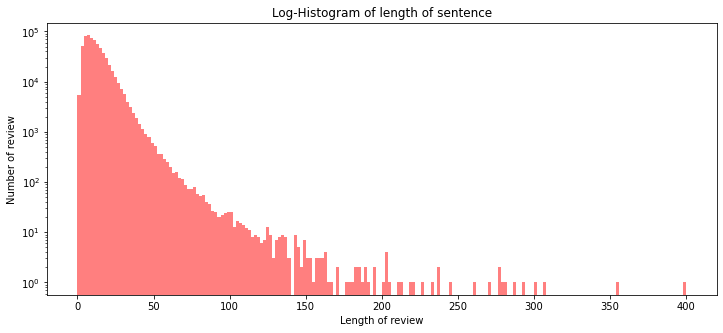

In [ ]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(df['token_len'], bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of sentence')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

# train test split

In [ ]:
# train test split for df
from sklearn.model_selection import train_test_split
target = df['sentiment']
train_data, test_data = train_test_split(df, test_size=0.2,random_state = 42,stratify = target)
train_data.head()

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling,sentiment
317313,Aug 26 21:55:00 2019,bestbuy.com,ss_ref,Reviews,1.0,what was a simple warranty issue was turned in...,what was a simple warranty issue was turned in...,5,1.0,0.0,0
22977,Dec 04 16:43:00 2021,lg.com,lg_ref,Reviews,5.0,❤ our new fridge,our new fridge,5,1.0,10.0,1
75525,Jul 23 04:05:00 2020,costco.com,lg_wm,Reviews,1.0,this is the fourth time its stopped working in...,this is the fourth time its stopped working in...,5,1.0,0.0,0
179817,Feb 24 05:00:00 2021,homedepot.com,lg_wm,Reviews,5.0,it holds a big amount of clothes and dries the...,it holds a big amount of clothes and dries the...,5,1.0,10.0,1
570626,Feb 11 00:00:00 2021,trustpilot.com,lg_ref,Reviews,1.0,i later discovered this was probably due to a ...,i later discovered this was probably due to a ...,5,0.0,2.0,0


In [ ]:
# # train_test 저장
# import pickle
# with open('train_'+aspect,'wb')as fw:
#   pickle.dump(train_data,fw)

# with open('test_'+aspect,'wb')as fw:
#   pickle.dump(test_data,fw)


# with open('train_'+aspect,'rb') as fr:
#   train_data = pickle.load(fr)

# with open('test_'+aspect,'rb') as fr:
#   test_data = pickle.load(fr)


# os.getcwd()

# 기존 코드

In [ ]:
# 일케하니 되네,
!pip install nlp==0.4.0
!pip install transformers
!pip install sentencepiece

from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments, TFBertModel
from nlp import load_dataset
import torch
import numpy as np

import os
import re
import numpy as np
from tqdm import tqdm
import pickle

import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 212 kB 78.0 MB/s 
     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 64.5 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
     |████████████████████████████████| 6.5 MB 69.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


# Training

## BERT Tokenizer

In [ ]:
# 시각화

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 32
NUM_EPOCHS = 10
VALID_SPLIT = 0.2
MAX_LEN = 32 # EDA에서 추출된 Max Length

path = '/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/Training/Bert Classifier'
os.chdir(path)
# DATA_IN_PATH = 'data_in/KOR'
# DATA_OUT_PATH = "data_out/KOR"

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", cache_dir='bert_ckpt', do_lower_case=False)

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at bert_ckpt/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at bert_ckpt/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at bert_ckpt/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",

In [ ]:
test_sentence = df['sent'].iloc[2]

encode = tokenizer.encode(test_sentence)
token_print = [tokenizer.decode(token) for token in encode]

print(encode)
print(token_print)

[101, 2093, 7167, 1997, 3256, 2003, 1037, 2307, 3444, 1012, 102]
['[ C L S ]', 't h r e e', 'l o t s', 'o f', 'i c e', 'i s', 'a', 'g r e a t', 'f e a t u r e', '.', '[ S E P ]']


In [ ]:
# 스페셜 토큰
print(tokenizer.all_special_tokens, "\n", tokenizer.all_special_ids)

eng_encode = tokenizer.encode("That's what she've been saying")
eng_decode = tokenizer.decode(eng_encode)


print(eng_encode)
# [101, 31178, 11356, 102]

print(eng_decode)
# [CLS] Hello world [SEP]

#작동 이상무

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'] 
 [100, 102, 0, 101, 103]
[101, 100, 1005, 1055, 2054, 2016, 1005, 2310, 2042, 3038, 102]
[CLS] [UNK]'s what she've been saying [SEP]


In [ ]:
# Bert Tokenizer

# 참조: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus

def bert_tokenizer(sent, MAX_LEN):
    
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
        max_length = MAX_LEN,           # Pad & truncate all sentences.
        pad_to_max_length = True,
        return_attention_mask = True   # Construct attn. masks.
        
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences
    
    return input_id, attention_mask, token_type_id

In [ ]:
train_data

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling,sentiment
317313,Aug 26 21:55:00 2019,bestbuy.com,ss_ref,Reviews,1.0,what was a simple warranty issue was turned in...,what was a simple warranty issue was turned in...,5,1.0,0.0,0
22977,Dec 04 16:43:00 2021,lg.com,lg_ref,Reviews,5.0,❤ our new fridge,our new fridge,5,1.0,10.0,1
75525,Jul 23 04:05:00 2020,costco.com,lg_wm,Reviews,1.0,this is the fourth time its stopped working in...,this is the fourth time its stopped working in...,5,1.0,0.0,0
179817,Feb 24 05:00:00 2021,homedepot.com,lg_wm,Reviews,5.0,it holds a big amount of clothes and dries the...,it holds a big amount of clothes and dries the...,5,1.0,10.0,1
570626,Feb 11 00:00:00 2021,trustpilot.com,lg_ref,Reviews,1.0,i later discovered this was probably due to a ...,i later discovered this was probably due to a ...,5,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
438557,Jun 25 22:13:00 2021,bestbuy.com,lg_wm,Reviews,5.0,"so far so good, ease of use and smart operatin...",so far so good ease of use and smart operating...,5,1.0,10.0,1
55954,Nov 24 00:49:00 2020,costco.com,ss_ref,Reviews,5.0,"large, open interior design is great.",large open interior design is great,5,1.0,10.0,1
553520,Jun 28 03:00:00 2020,flipkart.com,ss_ref,Reviews,1.0,i am.in that situation that i cannot replace i...,i that situation that i cannot replace it beca...,5,1.0,0.0,0
271358,Feb 03 23:35:00 2021,samsclub.com,lg_ref,Reviews,5.0,"no issues, but i couldn't figure out how to ch...",no issues but i couldn t figure out how to cha...,5,1.0,10.0,1


In [ ]:
# train_data = train_data[:1000] # for test

input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for train_sent, train_label in tqdm(zip(train_data['sent'], train_data['sentiment']), total=len(train_data)):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(train_sent, MAX_LEN)
        
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass

train_movie_input_ids = np.array(input_ids, dtype=int)
train_movie_attention_masks = np.array(attention_masks, dtype=int)
train_movie_type_ids = np.array(token_type_ids, dtype=int)
train_movie_inputs = (train_movie_input_ids, train_movie_attention_masks, train_movie_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_movie_input_ids), len(train_data_labels)))

  0%|          | 0/500889 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 500889/500889 [03:25<00:00, 2441.90it/s]

# sents: 500889, # labels: 500889


In [ ]:
# 최대 길이: 21
input_id = train_movie_input_ids[100]
attention_mask = train_movie_attention_masks[100]
token_type_id = train_movie_type_ids[100]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[  101  2059  2055  1037  3204  2101  1045  2071  2053  2936  2131 14291
  2094  3256  2593  1012   102     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[CLS] then about a month later i could no longer get cubed ice either. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-uncased',
                                  dir_path='bert_ckpt',
                                  num_class=2)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at bert_ckpt/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h5 from cache at bert_ckpt/775efbdc2152093295bc5

In [ ]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # 원본
# loss = tf.keras.losses.CategoricalCrossentropy
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

## train section

In [ ]:
model_name = "tf2_bert_ver"+ str(ver) + "binary"
# model_name = "tf2_RoBERT-a_ver"+ str(ver) + "binary"
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

# checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
# checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint_path = os.path.join("check_points", model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)



# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_movie_inputs, train_data_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch

print(history.history)
# {'loss': [0.27561405301094055, 0.21500195562839508, 0.16746611893177032, 0.1280730664730072], 'accuracy': [0.8881962299346924, 0.9158995151519775, 0.9370793700218201, 0.9533504247665405], 'val_loss': [0.24991875886917114, 0.251598596572876, 0.259513258934021, 0.3273990750312805], 'val_accuracy': [0.899828314781189, 0.9027131795883179, 0.9017548561096191, 0.8981512784957886]}

check_points/tf2_bert_ver1binary -- Folder already exists 



NameError: ignored

In [ ]:
model_name = "tf2_bert_ver"+ str(ver) + "binary"
checkpoint_path = os.path.join("check_points", model_name, 'weights.h5')
# 불러오기
cls_model.load_weights(checkpoint_path)

#Test

In [ ]:
test_data.head()

,CreatedTime,Domain,label,source,Star Rating,sent,remove_link_punc,Max rating,Min rating,scaling,sentiment
133467,Jun 26 05:00:00 2018,homedepot.com,ss_ref,Reviews,5.0,other models and even other brands all seem to...,other models and even other brands all seem to...,5,1.0,10.0,1
539627,Nov 17 05:00:00 2021,consumeraffairs.com,ss_ref,Reviews,1.0,i had an impression that samsung was a good br...,i had an impression that samsung was a good br...,5,0.0,2.0,0
218928,Sep 07 08:14:00 2020,rcwilley.com,ss_ref,Reviews,5.0,we bought this for our retirement home the dou...,we bought this for our retirement home the dou...,5,1.0,10.0,1
655873,Jun 21 21:00:00 2018,maytag.com,ss_wm,Reviews,4.0,has the old fashioned dial knobs which i don't...,has the old fashioned dial knobs which i don t...,5,1.0,7.5,1
46771,Jul 27 16:00:00 2019,costco.com,ss_ref,Reviews,5.0,we can find and access foods in both cooler an...,we can find and access foods in both cooler an...,5,1.0,10.0,1


In [ ]:
# #원본
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sent, test_label in tqdm(zip(test_data['sent'], test_data['sentiment'])):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(test_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)
    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids) # 이걸 가져와서 쓰면 됨. 

test_data_labels = np.asarray(test_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("num sents, labels {}, {}".format(len(test_movie_input_ids), len(test_data_labels)))

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
125223it [00:51, 2441.52it/s]


num sents, labels 125223, 125223


In [ ]:
test_data_labels

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=1024)
print("test loss, test acc: ", results)
# 123/123 [==============================] - 1258s 10s/step - loss: 0.2541 - accuracy: 0.9009
# test loss, test acc:  [0.2541171908378601, 0.9009367227554321]

123/123 [==============================] - 1258s 10s/step - loss: 0.2541 - accuracy: 0.9009
test loss, test acc:  [0.2541171908378601, 0.9009367227554321]


# =========

# Test set Evaluation 

## load test set

In [ ]:
cols = ['sent_id',	'source',	'original',	'label']
test_df = pd.DataFrame(data = [], columns = cols)
import os
os.chdir('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/Test set/labeled test set')
for excel_file in os.listdir():
  temp_df = pd.read_excel(excel_file,index_col=0)
  test_df = test_df.append(temp_df)

In [ ]:
test_df

,sent_id,source,original,label
0.0,93609,Reddit,i got a case similar to this one which is clea...,0
1.0,16481,Reddit,at that point essentially shut it down and pow...,0
2.0,29473,Reddit,the fridge was the most expensive one and it n...,0
3.0,33560,Reddit,if you look on their support page its clear th...,0
4.0,133183,Reddit,if you cant get a perfect length you can alway...,0
...,...,...,...,...
7994.0,859511.0,Facebook,"Laura Vinson, 4316 Summercrest Blvd Unit 101 A...",-1.0
7995.0,914321.0,Facebook,Buyers beware – I submitted a BBB case on 12/4...,-1.0
7996.0,879633.0,Facebook,"No, I am NOT happy... exchanged it this mornin...",-1.0
7997.0,883021.0,Facebook,I will never buy a Samsung product again. We p...,-1.0


## pre-process test set

In [ ]:
test_df.reset_index(inplace = True,drop = True)
test_df

,sent_id,source,original,label
0,93609,Reddit,i got a case similar to this one which is clea...,0
1,16481,Reddit,at that point essentially shut it down and pow...,0
2,29473,Reddit,the fridge was the most expensive one and it n...,0
3,33560,Reddit,if you look on their support page its clear th...,0
4,133183,Reddit,if you cant get a perfect length you can alway...,0
...,...,...,...,...
9990,859511.0,Facebook,"Laura Vinson, 4316 Summercrest Blvd Unit 101 A...",-1.0
9991,914321.0,Facebook,Buyers beware – I submitted a BBB case on 12/4...,-1.0
9992,879633.0,Facebook,"No, I am NOT happy... exchanged it this mornin...",-1.0
9993,883021.0,Facebook,I will never buy a Samsung product again. We p...,-1.0


In [ ]:
test_df[test_df['label'].isna()]

,sent_id,source,original,label


In [ ]:

# ** 임시. -1도 되면 걍 두기. 안됨.
def temp_label_changer(label):
  label = int(label)
  if label == -1:
    return 0
  # elif label ==0:
  #   return 1 # 중립은 없다..
  elif label ==1:
    return 1

test_df['label'] = test_df['label'].progress_apply(lambda label: temp_label_changer(label))

100%|██████████| 9995/9995 [00:00<00:00, 571371.09it/s]


### binary only

In [ ]:
test_df = test_df[(test_df['label'] == 0)|(test_df['label'] == 1)]
test_df

,sent_id,source,original,label
5,176309,Reddit,as for agitator gentleness i find my impeller ...,1.0
8,16327,Reddit,we have an lg refrigerator it s been down on u...,0.0
10,136493,Reddit,i m lucky i m handy but i ll never buy another...,0.0
12,67627,Reddit,anybody doing a side by side comparison of go ...,1.0
13,98880,Reddit,we had an issue related to the delivery best b...,1.0
...,...,...,...,...
9990,859511.0,Facebook,"Laura Vinson, 4316 Summercrest Blvd Unit 101 A...",0.0
9991,914321.0,Facebook,Buyers beware – I submitted a BBB case on 12/4...,0.0
9992,879633.0,Facebook,"No, I am NOT happy... exchanged it this mornin...",0.0
9993,883021.0,Facebook,I will never buy a Samsung product again. We p...,0.0


### neutral2binary

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/Test set/neutral2binary')
neutral_df = pd.DataFrame()
for temp_file in os.listdir():
  temp_df = pd.read_excel(temp_file,index_col=0)
  neutral_df = neutral_df.append(temp_df)

neutral_df = neutral_df[['sent_id', 'source', 'original', 'label']]
neutral_df

,sent_id,source,original,label
0.0,93609.0,Reddit,i got a case similar to this one which is clea...,1.0
1.0,16481.0,Reddit,at that point essentially shut it down and pow...,1.0
2.0,29473.0,Reddit,the fridge was the most expensive one and it n...,-1.0
3.0,33560.0,Reddit,if you look on their support page its clear th...,1.0
4.0,133183.0,Reddit,if you cant get a perfect length you can alway...,-1.0
...,...,...,...,...
1828.0,858376.0,Facebook,Ruth Garside Apple that's what I was told too ...,-1.0
1835.0,856289.0,Facebook,Cathy Matrisotto Have had LG refrigerator that...,-1.0
1865.0,778400.0,Facebook,LG this is David Zimmerman and you told me to ...,-1.0
1901.0,997776.0,Facebook,Hi would like to check with you i have 3 years...,-1.0


In [ ]:

# ** 임시. -1도 되면 걍 두기. 안됨.
def temp_label_changer(label):
  label = int(label)
  if label == -1:
    return 0
  # elif label ==0:
  #   return 1 # 중립은 없다..
  elif label ==1:
    return 1

neutral_df['label'] = neutral_df['label'].progress_apply(lambda label: temp_label_changer(label))
test_df = test_df.append(neutral_df)

100%|██████████| 1913/1913 [00:00<00:00, 406428.10it/s]


### remove link puctuation

In [ ]:
import re
from tqdm import tqdm
tqdm.pandas()

# link_list = [".com/",".net/",".ly/"".tt/",".me/",".gl/",".lc/",".za/",".to/",".co/",".ke/",".vn/","index.php",".ps",".eu/",".in/",".be/",".tt/", ".ru/", "source=", "ref="]
link_list = [".com/",".net/",".ly/",".tt/",".me/",".gl/",".lc/",".za/",".to/",".co/",".ke/",".vn/","index.php",".ps/",".eu/",".in/",".be/", ".ru/", "source=", "ref=",
             ".fr/",".org/",".ge/",".us/",".info/",".nu/",".ro/",".co.kr/",".es/",".lk/",".eu/",".fm/",".ca/",".uk/",".nl/","/js/",".su/",".lv/",".html",".de/",".ie/",".jp/"]


link_list_2 = ["\.com","\.net","\.ly","\.tt","\.me","\.gl","\.lc","\.za","\.to","\.co","\.ke","\.vn","index.php","\.ps","\.eu","\.in","\.be", "\.ru",
"\.fr","\.or","\.ge","\.us","\.info","\.nu","\.ro","\.co.kr","\.es","\.lk","\.eu","\.fm","\.ca","\.uk","\.nl","\.js","\.su","\.lv","\.to","\.html","\.de","\.ie","\.jp"]

def remove_link_punc_unicode(string):

  # removing links # 정상 작동
  temp_string = re.sub('http[s]?://(?:[a-zA-Z]|[0–9]|[$-_@.&+]|(?:%[0–9a-fA-F][0–9a-fA-F]))+', ' ', string)


  for link in link_list:
    pat = r"[a-zA-Z0-9\$-_@?.&+]+"+link+"[a-zA-Z0-9\$-_@?.&+]+"
    temp_string = re.sub(pat, ' ', temp_string)

  for link in link_list_2:
    pat = r"[a-zA-Z0-9\$-_@?.&+]+"+link
    temp_string = re.sub(pat, ' ', temp_string)
  # get lost unicode  
  temp_string = temp_string.encode("ascii", "ignore").decode('utf-8')

  # get lost \n \t \v 

  temp_string = re.sub(r"\\[rtnfv]|[\t\n\r\f\v]"," ",temp_string)



  # removing all everything except a-z english letters # 작동
  regex = re.compile('[^a-zA-Z]')
  temp_string = regex.sub(' ', temp_string)

  #removing extra spaces #작동
  clean_string = re.sub(' +', ' ', temp_string).lower() # uncased 시점 **

  return clean_string
  

test_df['remove_link_punc'] = test_df['original'].progress_apply(lambda customer_sents: remove_link_punc_unicode(customer_sents)) 

100%|██████████| 9995/9995 [00:08<00:00, 1163.27it/s]


In [ ]:
test_df['sentiment'] = test_df['label'].apply(lambda x: int(x))
test_df['sentiment'].value_counts()

1    6017
0    3978
Name: sentiment, dtype: int64

In [ ]:
test_df = test_df.drop(['original','label'],axis = 1)
test_df

,sent_id,source,remove_link_punc,sentiment
5.0,176309,Reddit,as for agitator gentleness i find my impeller ...,1
8.0,16327,Reddit,we have an lg refrigerator it s been down on u...,0
10.0,136493,Reddit,i m lucky i m handy but i ll never buy another...,0
12.0,67627,Reddit,anybody doing a side by side comparison of go ...,1
13.0,98880,Reddit,we had an issue related to the delivery best b...,1
...,...,...,...,...
1828.0,858376.0,Facebook,ruth garside apple that s what i was told too ...,0
1835.0,856289.0,Facebook,cathy matrisotto have had lg refrigerator that...,0
1865.0,778400.0,Facebook,lg this is david zimmerman and you told me to ...,0
1901.0,997776.0,Facebook,hi would like to check with you i have years o...,0


In [ ]:
# from tqdm import tqdm
tqdm.pandas()

def lower(sent):
  try:
    return str(sent).lower()
  except:
    print(sent)
test_df['sent'] = test_df['remove_link_punc'].progress_apply(lambda sent: lower(sent))
test_df['sent'].head()

100%|██████████| 9995/9995 [00:00<00:00, 519133.03it/s]


5.0     as for agitator gentleness i find my impeller ...
8.0     we have an lg refrigerator it s been down on u...
10.0    i m lucky i m handy but i ll never buy another...
12.0    anybody doing a side by side comparison of go ...
13.0    we had an issue related to the delivery best b...
Name: sent, dtype: object

In [ ]:
test_df['sentiment'].value_counts()

1    6017
0    3978
Name: sentiment, dtype: int64

### to BERT input

In [ ]:
# #원본
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sent, test_label in tqdm(zip(test_df['sent'], test_df['sentiment'])):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(test_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)
    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids) # 이걸 가져와서 쓰면 됨. 

test_data_labels = np.asarray(test_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("num sents, labels {}, {}".format(len(test_movie_input_ids), len(test_data_labels)))

0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
9995it [00:07, 1387.24it/s]


num sents, labels 9995, 9995


In [ ]:
test_data_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
model_name = "tf2_bert_ver"+ str(ver) + "binary"
checkpoint_path = os.path.join("check_points", model_name, 'weights.h5')
# 불러오기
cls_model.load_weights(checkpoint_path)

results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=1024)
print("test loss, test acc: ", results)
# 


10/10 [==============================] - 94s 9s/step - loss: 0.4837 - accuracy: 0.8301
test loss, test acc:  [0.4837299585342407, 0.8301150798797607]


In [ ]:
# 부정 document만 뽑아내기
labels = pd.DataFrame(test_data_labels)
len(test_movie_inputs)

In [ ]:
sent_pred = cls_model.predict(test_movie_inputs,batch_size=1024)
# sent_pred.shape

In [ ]:
cls_model.predict(test_movie_inputs)

In [ ]:
sent_pred.shape

In [ ]:
sent_pred_df = pd.DataFrame(sent_pred,columns = ['neg','pos'])

sent_pred_df['sent_pred'] = sent_pred_df['pos'] > sent_pred_df['neg']
sent_pred_df['sent_pred'] = sent_pred_df['sent_pred'].apply(lambda x: int(x))

  
  



In [ ]:
test_data.reset_index(drop = True,inplace = True)
docus = pd.concat([test_data,sent_pred_df],axis = 1) #pd.concat([df1,df2],axis = 1) axis = 1 은 열방향.(옆에 붙이기) pd.concat([df1,df2],axis = 0) 은 행방향(밑에 붙이기)
docus

# Evaluation

In [ ]:
docus = docus.dropna()
docus['sent_pred'] = docus['sent_pred'].astype('int') 

import numpy as np
test_ans = np.array(docus[aspect])
test_pred = np.array(docus['sent_pred'])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(test_ans, test_pred)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(test_ans, test_pred))


# Sentiment Prediction

In [ ]:
# 모든 소스대상으로 remove link punc 진행. 소셜미디어때문에